## **PROBLEM STATEMENT**

It is important for any retail company to focus on customer though continuous engagement which translates to increased sales and resultant profitability measured over a period. The customer churn results in not just loss of potential revenue and future profits together with sunk acquisition costs but also negative publicity and incurrence of additional cost of new acquisitions.

On the other hand, Customer focus leads to retention which in turn leads to generation of value, not just volumes. Thus, understanding of customer churn and the underlying factors is central to customer relationship management.

Retailers develop metric to capture customer response towards the product, service, price and competition so that they offer better products and service delivery to customers in comparison with competition. In retail business, a customer is treated as churned once his/her transactions/interactions/visits outdate a particular amount of time. It happens when the product/service is no more used or he uses a product/service of competitor. It is useful to understand defected customer in terms of interests and preferences  to win them back.

It is possible to understand the customer based on historical data of customers containing the characteristics of customers, their transactions, the interactions with them  etc. Customer churn predictions help the retail company devise suitable marketing programs to target specific groups of retail customers as part of continued engagement. To ensure that such marketing spend is appropriately directed to the customers likely to be retained and/or with high probability of retention.

We have to classify each customer  as high/medium/low under the target attribute “RententionPotential”. Here identifying the medium level customers is important as this category  indicates where some intelligent action may lead to high possibility of retaining the customers who are likely to churn.

## Importing Libraries

In [ ]:
# Importing the libraries
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

## Reading the Train data frames

In [ ]:
# Reading the customerdata
cust_train = pd.read_excel('/content/Customerdata_Train.xlsx')
cust_train.head()

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay
0,C16368,CITY2,2012-09-28,0,0,0,Monday
1,C20345,CITY2,2010-12-19,1,1,1,Friday
2,C17683,CITY2,2010-10-03,0,0,0,Wednesday
3,C18647,CITY4,2010-11-27,0,0,0,Monday
4,C36692,CITY2,2009-12-04,1,1,0,Friday


In [ ]:
# Reading the Emaildata
email_train = pd.read_excel('/content/Emaildata_Train.xlsx')
email_train.head()

,CustomerID,DateOfemail,EmailType,timestamp,MailOpened,MailClicked
0,C16368,2012-09-28,WelcomeEmail,15:56:50,yes,NotApplicable
1,C20345,2010-12-19,WelcomeEmail,15:10:30,yes,NotApplicable
2,C17683,2010-10-03,WelcomeEmail,17:12:24,yes,NotApplicable
3,C18647,2010-11-27,WelcomeEmail,16:59:02,yes,NotApplicable
4,C36692,2009-12-04,WelcomeEmail,17:27:22,yes,NotApplicable


In [ ]:
# Reading the Train data
train_train = pd.read_excel('/content/Train.xlsx')
train_train.head()

,CustomerID,RetentionPotential
0,C37869,Low
1,C33841,Low
2,C29464,Low
3,C28158,Low
4,C22785,High


In [ ]:
# Reading the Transactionsdata
trans_train = pd.read_excel('/content/transactionsdata_Train.xlsx')
trans_train.head()

,CustomerID,DateOfOrder,timestamp,OrderQuantity
0,C16368,2013-08-11,15:17:52,15
1,C20345,2011-04-01,19:50:00,92
2,C20345,2012-06-29,15:11:56,95
3,C20345,2012-09-22,20:49:10,74
4,C20345,2011-08-23,11:50:26,81


In [ ]:
# Printing the number of rows and columns in the dataframe
cust_train.shape

(23820, 7)

In [ ]:
email_train.shape

(517672, 6)

In [ ]:
train_train.shape

(23820, 2)

In [ ]:
trans_train.shape

(104755, 4)

## Checking datatypes for train dataframe

In [ ]:
# check the cust_train datatypes
cust_train.dtypes

CustomerID                      object
City                            object
DateOfRegistration      datetime64[ns]
OnlineCommunication              int64
AutomaticRefill                  int64
DoorstepDelivery                 int64
PreferredDeliveryDay            object
dtype: object

In [ ]:
# Check the email_train datatypes
email_train.dtypes

CustomerID     object
DateOfemail    object
EmailType      object
timestamp      object
MailOpened     object
MailClicked    object
dtype: object

In [ ]:
# check the train_train datatypes
train_train.dtypes

CustomerID            object
RetentionPotential    object
dtype: object

In [ ]:
# Checking the trans_train datatypes
trans_train.dtypes

CustomerID       object
DateOfOrder      object
timestamp        object
OrderQuantity     int64
dtype: object

## Count the unique values for every column in the train dataframe

In [ ]:
# Identifying the unique values for cust_train
cust_train.nunique()

CustomerID              23820
City                        4
DateOfRegistration       2673
OnlineCommunication         2
AutomaticRefill             2
DoorstepDelivery            2
PreferredDeliveryDay        7
dtype: int64

In [ ]:
# Identifying the unique values for Email_train
email_train.nunique()

CustomerID     23820
DateOfemail     3382
EmailType          2
timestamp      14369
MailOpened         2
MailClicked        3
dtype: int64

In [ ]:
# Identifying the unique values for Train_train
train_train.nunique()

CustomerID            23820
RetentionPotential        3
dtype: int64

In [ ]:
# Identifying the unique values for Trans_train
trans_train.nunique()

CustomerID       23820
DateOfOrder       3151
timestamp        21399
OrderQuantity      451
dtype: int64

## **EXPLORATORY DATA ANALYSIS**

In [ ]:
# Checking null values in each column for cust_train
cust_train.isnull().sum()

CustomerID              0
City                    0
DateOfRegistration      0
OnlineCommunication     0
AutomaticRefill         0
DoorstepDelivery        0
PreferredDeliveryDay    0
dtype: int64

In [ ]:
# Checking null values in each column for email_train
email_train.isnull().sum()

CustomerID     0
DateOfemail    0
EmailType      0
timestamp      0
MailOpened     0
MailClicked    0
dtype: int64

In [ ]:
# Checking null values in each column for train_train
train_train.isnull().sum()

CustomerID            0
RetentionPotential    0
dtype: int64

In [ ]:
# Checking null values in each column for trans_train
trans_train.isnull().sum()

CustomerID       0
DateOfOrder      0
timestamp        0
OrderQuantity    0
dtype: int64

### **MERGING THE DATASETS**

In [ ]:
#  converting the "DateOfemail" column in the "email_train" dataframe into datetime format.
email_train["DateOfemail"]=pd.to_datetime(email_train["DateOfemail"])

In [ ]:
# calculate the frequency distribution of each variable for each unique customer in the "email_train" dataframe
def manp_data(email_train):
    email_train_email=pd.crosstab(email_train.CustomerID,email_train.EmailType).reset_index()
    email_train_mail=pd.crosstab(email_train.CustomerID,email_train.MailOpened).reset_index()
    email_train_click=pd.crosstab(email_train.CustomerID,email_train.MailClicked).reset_index()
    email_train=email_train_email.merge(email_train_mail,on="CustomerID",how="left").merge(email_train_click,on="CustomerID",how="left")
    return email_train
email_train=manp_data(email_train)

In [ ]:
# grouping the "trans_train" dataframe by the "CustomerID" column using the "groupby()" function
# resulting grouped dataframe is then aggregated using the "agg()" function to calculate the sum and count of the "OrderQuantity" column for each customer.
trans_train_re=trans_train.groupby(["CustomerID"]).agg({'OrderQuantity': ["sum","count"]}).reset_index()
trans_train_re.columns = ['_'.join(col) for col in trans_train_re.columns.values]

In [ ]:
trans_train_re.rename(columns={"CustomerID_":"CustomerID"},inplace=True)

In [ ]:
final_df=train_train.merge(email_train,on="CustomerID",how="left").merge(cust_train,on="CustomerID",how="left").merge(trans_train_re,
                                                                                               on="CustomerID",how="left")

In [ ]:
final_df

,CustomerID,RetentionPotential,CustomizedEmail,WelcomeEmail,no_x,yes_x,NotApplicable,no_y,yes_y,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,OrderQuantity_sum,OrderQuantity_count
0,C37869,Low,47,1,44,4,1,47,0,CITY4,2011-07-27,0,0,0,Thursday,982,8
1,C33841,Low,10,1,4,7,1,8,2,CITY1,2013-11-19,1,0,1,Thursday,43,1
2,C29464,Low,0,1,0,1,1,0,0,CITY2,2010-05-24,0,0,0,Tuesday,51,1
3,C28158,Low,0,1,0,1,1,0,0,CITY1,2017-06-19,1,0,0,Saturday,60,1
4,C22785,High,0,1,0,1,1,0,0,CITY2,2013-12-13,1,0,0,Thursday,41,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23815,C14975,Low,47,1,47,1,1,47,0,CITY4,2012-03-28,0,0,0,Tuesday,57,5
23816,C30392,Low,46,1,40,7,1,46,0,CITY2,2011-01-26,0,0,0,Monday,662,12
23817,C41735,Low,37,1,18,20,1,32,5,CITY3,2013-09-21,1,0,0,Wednesday,29,1
23818,C26055,Low,26,1,20,7,1,23,3,CITY4,2013-11-23,1,0,0,Friday,55,1


### **DATA PREPROCESSING**

In [ ]:
# Printing first 5rows of final_df
final_df.head()

,CustomerID,RetentionPotential,CustomizedEmail,WelcomeEmail,no_x,yes_x,NotApplicable,no_y,yes_y,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,OrderQuantity_sum,OrderQuantity_count
0,C37869,Low,47,1,44,4,1,47,0,CITY4,2011-07-27,0,0,0,Thursday,982,8
1,C33841,Low,10,1,4,7,1,8,2,CITY1,2013-11-19,1,0,1,Thursday,43,1
2,C29464,Low,0,1,0,1,1,0,0,CITY2,2010-05-24,0,0,0,Tuesday,51,1
3,C28158,Low,0,1,0,1,1,0,0,CITY1,2017-06-19,1,0,0,Saturday,60,1
4,C22785,High,0,1,0,1,1,0,0,CITY2,2013-12-13,1,0,0,Thursday,41,1


In [ ]:
# Printing last 5rows of final_df
final_df.tail()

,CustomerID,RetentionPotential,CustomizedEmail,WelcomeEmail,no_x,yes_x,NotApplicable,no_y,yes_y,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,OrderQuantity_sum,OrderQuantity_count
23815,C14975,Low,47,1,47,1,1,47,0,CITY4,2012-03-28,0,0,0,Tuesday,57,5
23816,C30392,Low,46,1,40,7,1,46,0,CITY2,2011-01-26,0,0,0,Monday,662,12
23817,C41735,Low,37,1,18,20,1,32,5,CITY3,2013-09-21,1,0,0,Wednesday,29,1
23818,C26055,Low,26,1,20,7,1,23,3,CITY4,2013-11-23,1,0,0,Friday,55,1
23819,C25058,High,0,1,0,1,1,0,0,CITY4,2011-11-16,0,0,0,Tuesday,52,1


In [ ]:
# checking the shape of final_df
final_df.shape

(23820, 17)

In [ ]:
# checking the size of final_df
final_df.size

404940

In [ ]:
# Understanding the structure of final_df
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23820 entries, 0 to 23819
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   CustomerID            23820 non-null  object        
 1   RetentionPotential    23820 non-null  object        
 2   CustomizedEmail       23820 non-null  int64         
 3   WelcomeEmail          23820 non-null  int64         
 4   no_x                  23820 non-null  int64         
 5   yes_x                 23820 non-null  int64         
 6   NotApplicable         23820 non-null  int64         
 7   no_y                  23820 non-null  int64         
 8   yes_y                 23820 non-null  int64         
 9   City                  23820 non-null  object        
 10  DateOfRegistration    23820 non-null  datetime64[ns]
 11  OnlineCommunication   23820 non-null  int64         
 12  AutomaticRefill       23820 non-null  int64         
 13  DoorstepDelivery

In [ ]:
# checking the nullvalues for every column
final_df.isnull().sum()

CustomerID              0
RetentionPotential      0
CustomizedEmail         0
WelcomeEmail            0
no_x                    0
yes_x                   0
NotApplicable           0
no_y                    0
yes_y                   0
City                    0
DateOfRegistration      0
OnlineCommunication     0
AutomaticRefill         0
DoorstepDelivery        0
PreferredDeliveryDay    0
OrderQuantity_sum       0
OrderQuantity_count     0
dtype: int64

In [ ]:
# checking the unique values for final_df
final_df.nunique()

CustomerID              23820
RetentionPotential          3
CustomizedEmail            84
WelcomeEmail                1
no_x                       70
yes_x                      61
NotApplicable               1
no_y                       80
yes_y                      30
City                        4
DateOfRegistration       2673
OnlineCommunication         2
AutomaticRefill             2
DoorstepDelivery            2
PreferredDeliveryDay        7
OrderQuantity_sum        2206
OrderQuantity_count       150
dtype: int64

In [ ]:
# checking the datatypes
final_df.dtypes

CustomerID                      object
RetentionPotential              object
CustomizedEmail                  int64
WelcomeEmail                     int64
no_x                             int64
yes_x                            int64
NotApplicable                    int64
no_y                             int64
yes_y                            int64
City                            object
DateOfRegistration      datetime64[ns]
OnlineCommunication              int64
AutomaticRefill                  int64
DoorstepDelivery                 int64
PreferredDeliveryDay            object
OrderQuantity_sum                int64
OrderQuantity_count              int64
dtype: object

In [ ]:
# compute and print a summary of several statistical measures of the numerical columns in the final_df
final_df.describe()

,CustomizedEmail,WelcomeEmail,no_x,yes_x,NotApplicable,no_y,yes_y,OnlineCommunication,AutomaticRefill,DoorstepDelivery,OrderQuantity_sum,OrderQuantity_count
count,23820.000000,23820.0,23820.000000,23820.000000,23820.0,23820.000000,23820.000000,23820.000000,23820.000000,23820.000000,23820.000000,23820.000000
mean,20.732662,1.0,15.525273,6.207389,1.0,19.563854,1.168808,0.660411,0.094710,0.037615,357.622922,4.397775
std,20.040546,0.0,17.239732,8.517405,0.0,19.168208,2.376062,0.473580,0.292821,0.190268,1335.649680,12.142475
min,0.000000,1.0,0.000000,1.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,1.0,0.000000,1.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,41.000000,1.000000
50%,19.000000,1.0,7.000000,2.000000,1.0,17.000000,0.000000,1.000000,0.000000,0.000000,65.000000,1.000000
75%,40.000000,1.0,32.000000,8.000000,1.0,38.000000,1.000000,1.000000,0.000000,0.000000,169.000000,3.000000
max,291.000000,1.0,91.000000,256.000000,1.0,249.000000,42.000000,1.000000,1.000000,1.000000,51429.000000,257.000000


In [ ]:
# checking the categorical columns in the final_df
categorical_cols = final_df.dtypes[final_df.dtypes == 'object'].index.tolist()
print(categorical_cols)

['CustomerID', 'RetentionPotential', 'City', 'PreferredDeliveryDay']


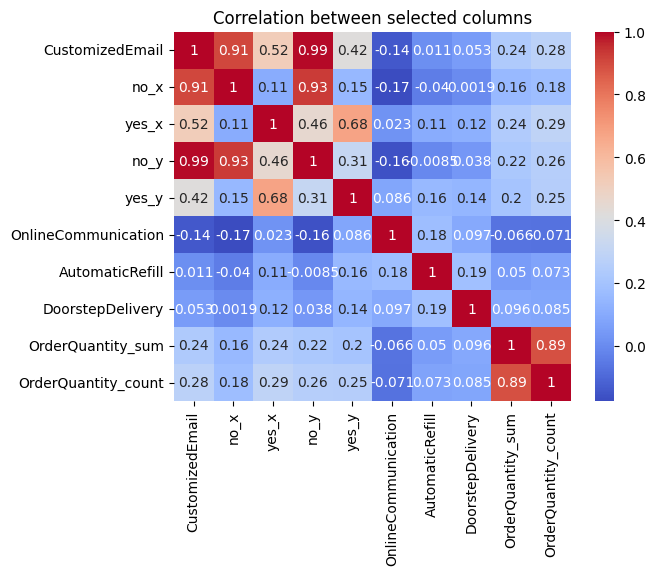

In [ ]:
# Select the columns you want to plot the correlation for final_df
selected_columns = ['CustomizedEmail', 'no_x', 'yes_x', 'no_y', 'yes_y', 'OnlineCommunication', 'AutomaticRefill', 'DoorstepDelivery', 'OrderQuantity_sum', 'OrderQuantity_count']

# Calculate the correlation matrix
corr_matrix = final_df[selected_columns].corr()

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between selected columns')
plt.show()

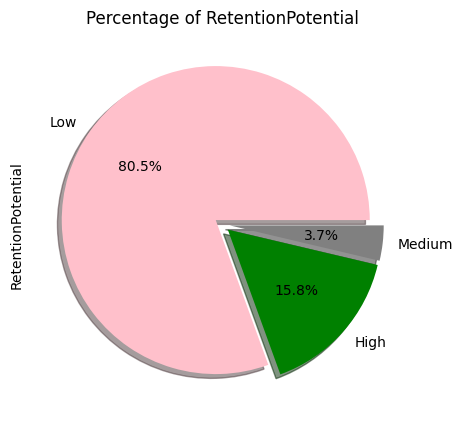

In [ ]:
#Percentage of the target attribute 'Retention potential' that is present in the train data
plt.figure(figsize=(8,5))
mycolors=['pink','green','grey']
myexplode = (0.05,0.05,0.05)
final_df['RetentionPotential'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,explode=myexplode,colors=mycolors);
plt.title('Percentage of RetentionPotential');

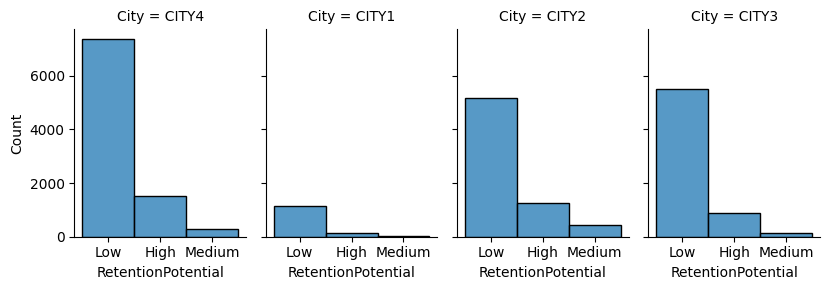

In [ ]:
#RetentionPotential based on City in train data
sns.displot(data=final_df, x="RetentionPotential", col="City", kind="hist", height=3, aspect=0.7,multiple="stack")

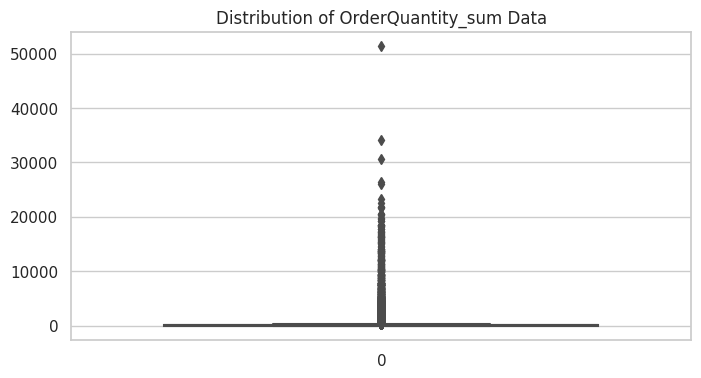

In [ ]:
# Plotting boxplot for the distribution of data in orderquantity
num_elem=['OrderQuantity_sum']
for i in num_elem:
    sns.set(style='whitegrid')
    fig, ax = plt.subplots(figsize=(8,4))
    g = sns.boxplot(final_df[i], width=0.7)
    ax.set_title('Distribution of OrderQuantity_sum Data',fontsize=12)
    plt.show()

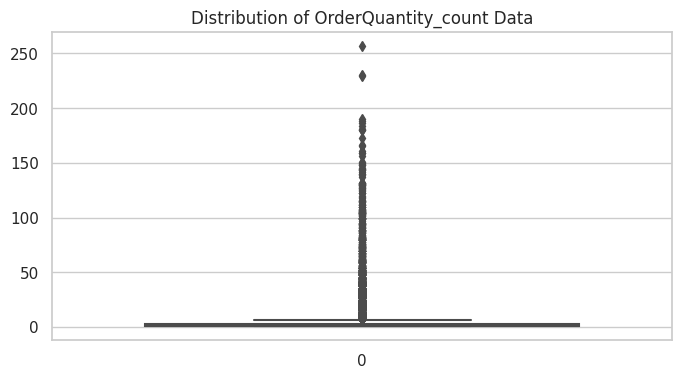

In [ ]:
# Plotting boxplot for the distribution of data in orderquantity
num_elem=['OrderQuantity_count']
for i in num_elem:
    sns.set(style='whitegrid')
    fig, ax = plt.subplots(figsize=(8,4))
    g = sns.boxplot(final_df[i], width=0.7)
    ax.set_title('Distribution of OrderQuantity_count Data',fontsize=12)
    plt.show()

 Box plot: It may be appropriate to simply ignore them and proceed with the analysis as if they were not there. This approach may be reasonable if the outliers are few in number and not significantly affecting the results.

<ipython-input-43-2821f1d364b1>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final_df['OrderQuantity_sum'], bins=None, hist=True, kde=True,color='blue')


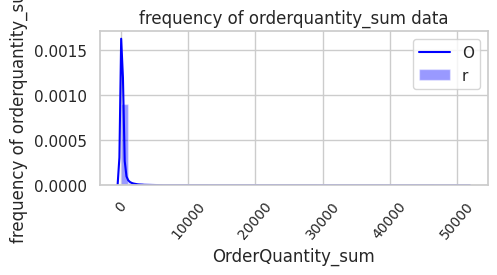

In [ ]:
plt.figure(figsize=(5,2))
plt.xticks(fontsize=10, rotation=50)

sns.set(style='whitegrid')
sns.distplot(final_df['OrderQuantity_sum'], bins=None, hist=True, kde=True,color='blue')
plt.title("frequency of orderquantity_sum data") # for histogram title
plt.ylabel('frequency of orderquantity_sum')
plt.legend('OrderQuantity_sum')
plt.show()

<ipython-input-44-537c639e4a3c>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final_df['OrderQuantity_count'], bins=None, hist=True, kde=True,color='blue')


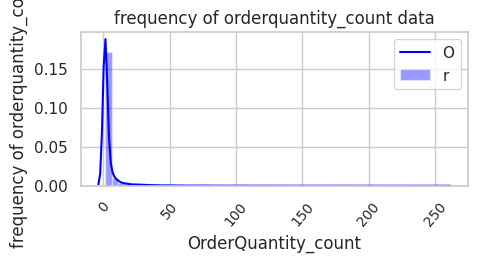

In [ ]:
plt.figure(figsize=(5,2))
plt.xticks(fontsize=10, rotation=50)

sns.set(style='whitegrid')
sns.distplot(final_df['OrderQuantity_count'], bins=None, hist=True, kde=True,color='blue')
plt.title("frequency of orderquantity_count data") # for histogram title
plt.ylabel('frequency of orderquantity_count')
plt.legend('OrderQuantity_count')
plt.show()

Here frequency of orderquantities(including both) are observed.It shows how many times each quatity is repeating.

Counter({'Low': 19185, 'High': 3756, 'Medium': 879})


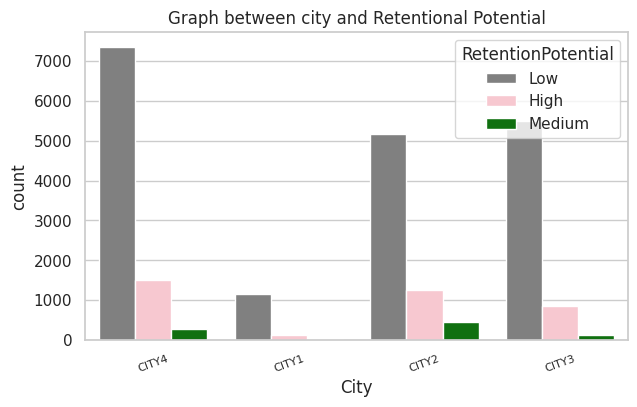

In [ ]:
from collections import Counter
a = Counter(final_df['RetentionPotential'])
print(a)
def barplot(column,df):
    bar_plot1=sns.countplot(x=column, data=df)

    
att=['City']
for i in att:
    plt.figure(figsize=(7,4))
    plt.xticks(fontsize=8, rotation=20)
    plt.title('Graph between city and Retentional Potential')
    sns.countplot(x='City', data=final_df, hue='RetentionPotential', palette=['grey', 'pink', 'green'])



Here RetentionPotential of customers are too low in city2, city4, city3

Counter({'Tuesday': 5343, 'Monday': 5300, 'Friday': 4167, 'Thursday': 4043, 'Wednesday': 3778, 'Saturday': 1003, 'Sunday': 186})


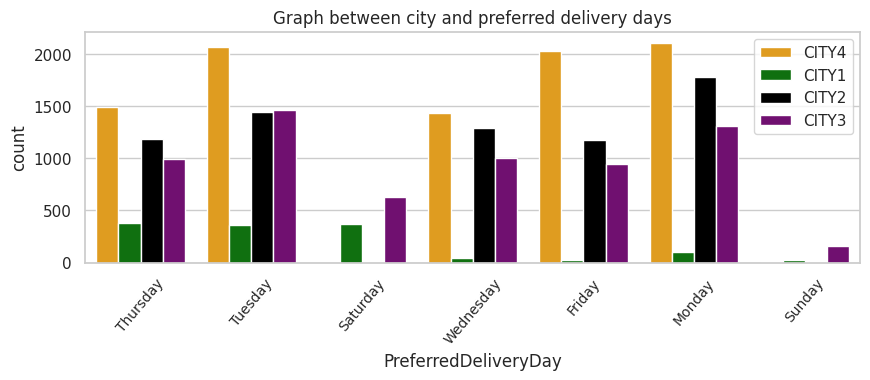

In [ ]:
# Observing the PreferredDeliveryDay
a = Counter(final_df['PreferredDeliveryDay'])
print(a)
plt.figure(figsize=(10,3))
plt.xticks(fontsize=10, rotation=50)
plt.title('Graph between city and preferred delivery days')
sns.countplot(x ='PreferredDeliveryDay', data=final_df, hue='City', palette=['orange','green','black','purple'])
plt.legend(loc='upper right')
plt.show()

Here by observing the preferred delivery days, Customers who are buying online are mostly maybe not working professional.Maybe mostly ordereditems are household items

In [ ]:
datecolumns = ['DateOfRegistration']

# Convert each date column to datetime format and create separate columns for year, month, and day
for col in datecolumns:
    final_df[col] = pd.to_datetime(final_df[col])
    final_df[col + '_year'] = final_df[col].dt.year
    final_df[col + '_month'] = final_df[col].dt.month
    final_df[col + '_day'] = final_df[col].dt.day

# drop the original DateOfRegistration column
final_df.drop(['DateOfRegistration'], axis=1, inplace=True)
    
final_df.head()


,CustomerID,RetentionPotential,CustomizedEmail,WelcomeEmail,no_x,yes_x,NotApplicable,no_y,yes_y,City,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,OrderQuantity_sum,OrderQuantity_count,DateOfRegistration_year,DateOfRegistration_month,DateOfRegistration_day
0,C37869,Low,47,1,44,4,1,47,0,CITY4,0,0,0,Thursday,982,8,2011,7,27
1,C33841,Low,10,1,4,7,1,8,2,CITY1,1,0,1,Thursday,43,1,2013,11,19
2,C29464,Low,0,1,0,1,1,0,0,CITY2,0,0,0,Tuesday,51,1,2010,5,24
3,C28158,Low,0,1,0,1,1,0,0,CITY1,1,0,0,Saturday,60,1,2017,6,19
4,C22785,High,0,1,0,1,1,0,0,CITY2,1,0,0,Thursday,41,1,2013,12,13


In [ ]:
# checking the categorical columns in the final_df
categorical_cols = final_df.dtypes[final_df.dtypes == 'object'].index.tolist()
print(categorical_cols)

['CustomerID', 'RetentionPotential', 'City', 'PreferredDeliveryDay']


In [ ]:
# count checking for retention potential column
final_df.RetentionPotential.value_counts()

Low       19185
High       3756
Medium      879
Name: RetentionPotential, dtype: int64

In [ ]:
# replace function takes a dictionary as an input argument specifying the replacement values for each string value
# replacing 'Low' with 0, 'Medium' with 1, and 'High' with 2
final_df['RetentionPotential'] = final_df['RetentionPotential'].replace({'Low': 0, 'Medium': 1, 'High': 2})
final_df

,CustomerID,RetentionPotential,CustomizedEmail,WelcomeEmail,no_x,yes_x,NotApplicable,no_y,yes_y,City,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,OrderQuantity_sum,OrderQuantity_count,DateOfRegistration_year,DateOfRegistration_month,DateOfRegistration_day
0,C37869,0,47,1,44,4,1,47,0,CITY4,0,0,0,Thursday,982,8,2011,7,27
1,C33841,0,10,1,4,7,1,8,2,CITY1,1,0,1,Thursday,43,1,2013,11,19
2,C29464,0,0,1,0,1,1,0,0,CITY2,0,0,0,Tuesday,51,1,2010,5,24
3,C28158,0,0,1,0,1,1,0,0,CITY1,1,0,0,Saturday,60,1,2017,6,19
4,C22785,2,0,1,0,1,1,0,0,CITY2,1,0,0,Thursday,41,1,2013,12,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23815,C14975,0,47,1,47,1,1,47,0,CITY4,0,0,0,Tuesday,57,5,2012,3,28
23816,C30392,0,46,1,40,7,1,46,0,CITY2,0,0,0,Monday,662,12,2011,1,26
23817,C41735,0,37,1,18,20,1,32,5,CITY3,1,0,0,Wednesday,29,1,2013,9,21
23818,C26055,0,26,1,20,7,1,23,3,CITY4,1,0,0,Friday,55,1,2013,11,23


In [ ]:
dummies = pd.get_dummies(final_df[['City', 'PreferredDeliveryDay']])

# concatenate the dummy variables with the original dataframe
final_df = pd.concat([final_df, dummies], axis=1)

# drop the original 'City', 'PreferredDeliveryDay' columns
final_df.drop(['City', 'PreferredDeliveryDay'], axis=1, inplace=True)

In [ ]:
final_df

,CustomerID,RetentionPotential,CustomizedEmail,WelcomeEmail,no_x,yes_x,NotApplicable,no_y,yes_y,OnlineCommunication,...,City_CITY2,City_CITY3,City_CITY4,PreferredDeliveryDay_Friday,PreferredDeliveryDay_Monday,PreferredDeliveryDay_Saturday,PreferredDeliveryDay_Sunday,PreferredDeliveryDay_Thursday,PreferredDeliveryDay_Tuesday,PreferredDeliveryDay_Wednesday
0,C37869,0,47,1,44,4,1,47,0,0,...,0,0,1,0,0,0,0,1,0,0
1,C33841,0,10,1,4,7,1,8,2,1,...,0,0,0,0,0,0,0,1,0,0
2,C29464,0,0,1,0,1,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
3,C28158,0,0,1,0,1,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,C22785,2,0,1,0,1,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23815,C14975,0,47,1,47,1,1,47,0,0,...,0,0,1,0,0,0,0,0,1,0
23816,C30392,0,46,1,40,7,1,46,0,0,...,1,0,0,0,1,0,0,0,0,0
23817,C41735,0,37,1,18,20,1,32,5,1,...,0,1,0,0,0,0,0,0,0,1
23818,C26055,0,26,1,20,7,1,23,3,1,...,0,0,1,1,0,0,0,0,0,0


In [ ]:
#dropping unique value columns
#dropping CustomerID due to more % of missing values
final_df=final_df.drop(['CustomerID'],axis=1)
final_df

,RetentionPotential,CustomizedEmail,WelcomeEmail,no_x,yes_x,NotApplicable,no_y,yes_y,OnlineCommunication,AutomaticRefill,...,City_CITY2,City_CITY3,City_CITY4,PreferredDeliveryDay_Friday,PreferredDeliveryDay_Monday,PreferredDeliveryDay_Saturday,PreferredDeliveryDay_Sunday,PreferredDeliveryDay_Thursday,PreferredDeliveryDay_Tuesday,PreferredDeliveryDay_Wednesday
0,0,47,1,44,4,1,47,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,0,10,1,4,7,1,8,2,1,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,1,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
3,0,0,1,0,1,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,2,0,1,0,1,1,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23815,0,47,1,47,1,1,47,0,0,0,...,0,0,1,0,0,0,0,0,1,0
23816,0,46,1,40,7,1,46,0,0,0,...,1,0,0,0,1,0,0,0,0,0
23817,0,37,1,18,20,1,32,5,1,0,...,0,1,0,0,0,0,0,0,0,1
23818,0,26,1,20,7,1,23,3,1,0,...,0,0,1,1,0,0,0,0,0,0


In [ ]:
# checking for columns present in the final_df 
final_df.columns

Index(['RetentionPotential', 'CustomizedEmail', 'WelcomeEmail', 'no_x',
       'yes_x', 'NotApplicable', 'no_y', 'yes_y', 'OnlineCommunication',
       'AutomaticRefill', 'DoorstepDelivery', 'OrderQuantity_sum',
       'OrderQuantity_count', 'DateOfRegistration_year',
       'DateOfRegistration_month', 'DateOfRegistration_day', 'City_CITY1',
       'City_CITY2', 'City_CITY3', 'City_CITY4', 'PreferredDeliveryDay_Friday',
       'PreferredDeliveryDay_Monday', 'PreferredDeliveryDay_Saturday',
       'PreferredDeliveryDay_Sunday', 'PreferredDeliveryDay_Thursday',
       'PreferredDeliveryDay_Tuesday', 'PreferredDeliveryDay_Wednesday'],
      dtype='object')

In [ ]:
# count checking for retention potential column
final_df.RetentionPotential.value_counts()

0    19185
2     3756
1      879
Name: RetentionPotential, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler

# df is the DataFrame containing the data
cols_to_scale = ['CustomizedEmail', 'WelcomeEmail', 'no_x',
       'yes_x', 'NotApplicable', 'no_y', 'yes_y', 'OnlineCommunication',
       'AutomaticRefill', 'DoorstepDelivery', 'OrderQuantity_sum',
       'OrderQuantity_count', 'DateOfRegistration_year',
       'DateOfRegistration_month', 'DateOfRegistration_day', 'City_CITY1',
       'City_CITY2', 'City_CITY3', 'City_CITY4', 'PreferredDeliveryDay_Friday',
       'PreferredDeliveryDay_Monday', 'PreferredDeliveryDay_Saturday',
       'PreferredDeliveryDay_Sunday', 'PreferredDeliveryDay_Thursday',
       'PreferredDeliveryDay_Tuesday', 'PreferredDeliveryDay_Wednesday']
scaler = StandardScaler()

for col in cols_to_scale:
    final_df[col] = scaler.fit_transform(final_df[col].values.reshape(-1, 1))


In [ ]:
final_df

,RetentionPotential,CustomizedEmail,WelcomeEmail,no_x,yes_x,NotApplicable,no_y,yes_y,OnlineCommunication,AutomaticRefill,...,City_CITY2,City_CITY3,City_CITY4,PreferredDeliveryDay_Friday,PreferredDeliveryDay_Monday,PreferredDeliveryDay_Saturday,PreferredDeliveryDay_Sunday,PreferredDeliveryDay_Thursday,PreferredDeliveryDay_Tuesday,PreferredDeliveryDay_Wednesday
0,0,1.310737,0.0,1.651727,-0.259168,0.0,1.431366,-0.491920,-1.394539,-0.323448,...,-0.637225,-0.611960,1.266993,-0.460466,-0.534955,-0.209663,-0.088713,2.211711,-0.537746,-0.434171
1,0,-0.535559,0.0,-0.668544,0.093060,0.0,-0.603296,0.349827,0.717083,-0.323448,...,-0.637225,-0.611960,-0.789270,-0.460466,-0.534955,-0.209663,-0.088713,2.211711,-0.537746,-0.434171
2,0,-1.034557,0.0,-0.900571,-0.611395,0.0,-1.020662,-0.491920,-1.394539,-0.323448,...,1.569303,-0.611960,-0.789270,-0.460466,-0.534955,-0.209663,-0.088713,-0.452139,1.859615,-0.434171
3,0,-1.034557,0.0,-0.900571,-0.611395,0.0,-1.020662,-0.491920,0.717083,-0.323448,...,-0.637225,-0.611960,-0.789270,-0.460466,-0.534955,4.769565,-0.088713,-0.452139,-0.537746,-0.434171
4,2,-1.034557,0.0,-0.900571,-0.611395,0.0,-1.020662,-0.491920,0.717083,-0.323448,...,1.569303,-0.611960,-0.789270,-0.460466,-0.534955,-0.209663,-0.088713,2.211711,-0.537746,-0.434171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23815,0,1.310737,0.0,1.825747,-0.611395,0.0,1.431366,-0.491920,-1.394539,-0.323448,...,-0.637225,-0.611960,1.266993,-0.460466,-0.534955,-0.209663,-0.088713,-0.452139,1.859615,-0.434171
23816,0,1.260837,0.0,1.419700,0.093060,0.0,1.379195,-0.491920,-1.394539,-0.323448,...,1.569303,-0.611960,-0.789270,-0.460466,1.869315,-0.209663,-0.088713,-0.452139,-0.537746,-0.434171
23817,0,0.811738,0.0,0.143551,1.619378,0.0,0.648804,1.612446,0.717083,-0.323448,...,-0.637225,1.634094,-0.789270,-0.460466,-0.534955,-0.209663,-0.088713,-0.452139,-0.537746,2.303242
23818,0,0.262840,0.0,0.259564,0.093060,0.0,0.179267,0.770700,0.717083,-0.323448,...,-0.637225,-0.611960,1.266993,2.171714,-0.534955,-0.209663,-0.088713,-0.452139,-0.537746,-0.434171


In [ ]:
final_df.columns

Index(['RetentionPotential', 'CustomizedEmail', 'WelcomeEmail', 'no_x',
       'yes_x', 'NotApplicable', 'no_y', 'yes_y', 'OnlineCommunication',
       'AutomaticRefill', 'DoorstepDelivery', 'OrderQuantity_sum',
       'OrderQuantity_count', 'DateOfRegistration_year',
       'DateOfRegistration_month', 'DateOfRegistration_day', 'City_CITY1',
       'City_CITY2', 'City_CITY3', 'City_CITY4', 'PreferredDeliveryDay_Friday',
       'PreferredDeliveryDay_Monday', 'PreferredDeliveryDay_Saturday',
       'PreferredDeliveryDay_Sunday', 'PreferredDeliveryDay_Thursday',
       'PreferredDeliveryDay_Tuesday', 'PreferredDeliveryDay_Wednesday'],
      dtype='object')

In [ ]:
# independent variables
X = final_df.drop('RetentionPotential', axis = 1)

# dependent variable
y = final_df["RetentionPotential"]

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
# Model selection is the process of choosing the best algorithm or model to use for a particular problem or task by evaluating and comparing different models


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shape of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (16674, 26)
X_test shape: (7146, 26)
y_train shape: (16674,)
y_test shape: (7146,)


In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X, y)

In [ ]:
X_train_sm.shape

(57555, 26)

In [ ]:
y_train_sm.shape

(57555,)

In [ ]:
y_train_sm.value_counts()

0    19185
2    19185
1    19185
Name: RetentionPotential, dtype: int64

In [ ]:
# Split the resampled data into train and test sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train_sm, y_train_sm, test_size=0.2, random_state=42,stratify=y_train_sm)

In [ ]:
X_train1.shape

(46044, 26)

In [ ]:
X_test1.shape

(11511, 26)

In [ ]:
y_train1.shape

(46044,)

In [ ]:
y_test1.shape

(11511,)

## **MODEL BUILDING**

In [ ]:
import os
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split, GridSearchCV

In [ ]:
# Instantiate the decision tree classifier
dtc = DecisionTreeClassifier()

In [ ]:
# Fit the classifier on the training data
dtc.fit(X_train1, y_train1)

DecisionTreeClassifier()

In [ ]:
# Predict the target variable for the test data
y_pred_train = dtc.predict(X_train1)
y_pred_test = dtc.predict(X_test1)

In [ ]:
#Checking different metrics for decision tree model with default hyper parameters
print('Checking different metrics for decision tree model with default hyper parameters:\n')

print("Train set metrics:")
train_acc = accuracy_score(y_train1, y_pred_train)
print("Training accuracy: ",train_acc)
conf_mat = confusion_matrix(y_train1, y_pred_train)
print('Confusion Matrix: \n',conf_mat)
class_rep1 = classification_report(y_train1,y_pred_train)
print('Classification Report: \n',class_rep1)

print("Test set metrics:")
test_acc = accuracy_score(y_test1, y_pred_test)
print('Testing accuracy: ',test_acc)
conf_matric = confusion_matrix(y_test1, y_pred_test)
print('Confusion Matrix: \n',conf_matric)
recall_test = recall_score(y_test1, y_pred_test, average='macro')
class_rep1 = classification_report(y_test1,y_pred_test)
print('Classification Report: \n',class_rep1)

Checking different metrics for decision tree model with default hyper parameters:

Train set metrics:
Training accuracy:  0.9925940404830162
Confusion Matrix: 
 [[15197     3   148]
 [   10 15338     0]
 [  180     0 15168]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     15348
           1       1.00      1.00      1.00     15348
           2       0.99      0.99      0.99     15348

    accuracy                           0.99     46044
   macro avg       0.99      0.99      0.99     46044
weighted avg       0.99      0.99      0.99     46044

Test set metrics:
Testing accuracy:  0.9314568673442793
Confusion Matrix: 
 [[3471   50  316]
 [  30 3766   41]
 [ 314   38 3485]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.90      0.91      3837
           1       0.98      0.98      0.98      3837
           2       0.91      0.91      0.91      3

In [ ]:
#Setting values for the parameters
#n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 10, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]
max_features = [1, 2, 5, 10]

#Creating a dictionary for the hyper parameters
hyperT = dict(max_depth = max_depth, min_samples_split = min_samples_split, 
              min_samples_leaf = min_samples_leaf, max_features=max_features)

#Applying GridSearchCV to get the best value for hyperparameters
gridT = GridSearchCV(dtc, hyperT, cv = 3, verbose = 1, n_jobs = -1)
bestT = gridT.fit(X_train1, y_train1)

Fitting 3 folds for each of 400 candidates, totalling 1200 fits


In [ ]:
#Printing the best hyperparameters
print('The best hyper parameters are: \n',gridT.best_params_)

The best hyper parameters are: 
 {'max_depth': 30, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [ ]:
#Fitting the decision tree model with the best hyper parameters obtained through GridSearchCV
dtc1 = DecisionTreeClassifier(criterion='gini',splitter='random',max_depth=30, min_samples_leaf=1,min_samples_split=2, max_features=10)
dtc1.fit(X_train1,y_train1)
y_pred_train = dtc1.predict(X_train1)
y_pred_test = dtc1.predict(X_test1)

In [ ]:
#Checking different metrics for decision tree model after tuning the hyper parameters
print('Checking different metrics for decision tree model after tuning the hyper parameters:\n')

print("Train set metrics:")
train_acc = accuracy_score(y_train1, y_pred_train)
print("Training accuracy: ",train_acc)
conf_mat = confusion_matrix(y_train1, y_pred_train)
print('Confusion Matrix: \n',conf_mat)
class_rep2 = classification_report(y_train1,y_pred_train)
print('Classification Report: \n',class_rep2)

print("Test set metrics:")
test_acc = accuracy_score(y_test1, y_pred_test)
print('Testing accuracy: ',test_acc)
conf_matric = confusion_matrix(y_test1, y_pred_test)
print('Confusion Matrix: \n',conf_matric)
class_rep2 = classification_report(y_test1,y_pred_test)
print('Classification Report: \n',class_rep2)

Checking different metrics for decision tree model after tuning the hyper parameters:

Train set metrics:
Training accuracy:  0.9597124489618626
Confusion Matrix: 
 [[13803    15  1530]
 [   14 15331     3]
 [  290     3 15055]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.90      0.94     15348
           1       1.00      1.00      1.00     15348
           2       0.91      0.98      0.94     15348

    accuracy                           0.96     46044
   macro avg       0.96      0.96      0.96     46044
weighted avg       0.96      0.96      0.96     46044

Test set metrics:
Testing accuracy:  0.9126922074537399
Confusion Matrix: 
 [[3230   61  546]
 [  37 3727   73]
 [ 227   61 3549]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.84      0.88      3837
           1       0.97      0.97      0.97      3837
           2       0.85      0.92      0.89   

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train1,y_train1)
pred_rf_train = rf.predict(X_train1)
pred_rf_test = rf.predict(X_test1)

In [ ]:
#Checking different metrics for RandomForestClassifier model with default hyper parameters
print('Checking different metrics for RandomForestClassifier model with default hyper parameters:\n')

print("Train set metrics:")
train_acc = accuracy_score(y_train1, pred_rf_train)
print("Training accuracy: ",train_acc)
conf_mat = confusion_matrix(y_train1, pred_rf_train)
print('Confusion Matrix: \n',conf_mat)
class_rep1 = classification_report(y_train1,pred_rf_train)
print('Classification Report: \n',class_rep1)

print("Test set metrics:")
test_acc = accuracy_score(y_test1, pred_rf_test)
print('Testing accuracy: ',test_acc)
conf_matric = confusion_matrix(y_test1, pred_rf_test)
print('Confusion Matrix: \n',conf_matric)
class_rep1 = classification_report(y_test1,pred_rf_test)
print('Classification Report: \n',class_rep1)

Checking different metrics for RandomForestClassifier model with default hyper parameters:

Train set metrics:
Training accuracy:  0.9925723221266615
Confusion Matrix: 
 [[15157     5   186]
 [    8 15340     0]
 [  143     0 15205]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     15348
           1       1.00      1.00      1.00     15348
           2       0.99      0.99      0.99     15348

    accuracy                           0.99     46044
   macro avg       0.99      0.99      0.99     46044
weighted avg       0.99      0.99      0.99     46044

Test set metrics:
Testing accuracy:  0.9524802362957171
Confusion Matrix: 
 [[3516   27  294]
 [  18 3813    6]
 [ 175   27 3635]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.92      0.93      3837
           1       0.99      0.99      0.99      3837
           2       0.92      0.95      0.

In [ ]:
#Setting values for the parameters
n_estimators = [100, 300,500]
max_depth = [5, 10,15]
min_samples_split = [2, 5, 8]
min_samples_leaf = [1, 2, 3]

#Creating a dictionary for the hyper parameters
hyper_rf = dict(n_estimators = n_estimators, max_depth = max_depth, 
              min_samples_split = min_samples_split, min_samples_leaf = min_samples_leaf)

#Applying GridSearchCV to get the best value for hyperparameters
gridrf = GridSearchCV(rf, hyper_rf, cv = 3, verbose = 1, n_jobs = -1)
bestrf = gridrf.fit(X_train1, y_train1)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


In [ ]:
#Printing the best hyperparameters
print('The best hyper parameters are:\n',gridrf.best_params_)

The best hyper parameters are:
 {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}


In [ ]:
#Fitting the random forest model with the best hyper parameters obtained through GridSearchCV
rf1 = RandomForestClassifier(max_depth=15, min_samples_leaf=1, min_samples_split=2, n_estimators=500)
rf1.fit(X_train1,y_train1)
pred_rf1_train = rf1.predict(X_train1)
pred_rf1_test = rf1.predict(X_test1)

In [ ]:
#Checking different metrics for RandomForestClassifier model after tuning the hyper parameters
print('Checking different metrics for RandomForestClassifier model after tuning the hyper parameters:\n')

print("Train set metrics:")
train_acc = accuracy_score(y_train1, pred_rf1_train)
print("Training accuracy: ",train_acc)
conf_mat = confusion_matrix(y_train1, pred_rf1_train)
print('Confusion Matrix: \n',conf_mat)
class_rep2 = classification_report(y_train1,pred_rf1_train)
print('Classification Report: \n',class_rep2)

print("Test set metrics:")
test_acc = accuracy_score(y_test1, pred_rf1_test)
print('Testing accuracy: ',test_acc)
conf_matric = confusion_matrix(y_test1, pred_rf1_test)
print('Confusion Matrix: \n',conf_matric)
class_rep2 = classification_report(y_test1,pred_rf1_test)
print('Classification Report: \n',class_rep2)

Checking different metrics for RandomForestClassifier model after tuning the hyper parameters:

Train set metrics:
Training accuracy:  0.9445095995135088
Confusion Matrix: 
 [[13259    68  2021]
 [   14 15325     9]
 [  387    56 14905]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.86      0.91     15348
           1       0.99      1.00      1.00     15348
           2       0.88      0.97      0.92     15348

    accuracy                           0.94     46044
   macro avg       0.95      0.94      0.94     46044
weighted avg       0.95      0.94      0.94     46044

Test set metrics:
Testing accuracy:  0.9339761966814352
Confusion Matrix: 
 [[3279   44  514]
 [  18 3807   12]
 [ 132   40 3665]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.85      0.90      3837
           1       0.98      0.99      0.99      3837
           2       0.87      0.96    

In [ ]:
# Create a KNN classifier 
knn = KNeighborsClassifier()

In [ ]:
# Train the classifier using the training data
knn.fit(X_train1, y_train1)

KNeighborsClassifier()

In [ ]:
# Predict the classes of the testing data
train_pred_knn = knn.predict(X_train1)
test_pred_knn = knn.predict(X_test1)

In [ ]:
#Checking different metrics for KNeighborsClassifier model with default hyper parameters
print('Checking different metrics for KNeighborsClassifier model with default hyper parameters:\n')

print("Train set metrics:")
train_acc = accuracy_score(y_train1, train_pred_knn)
print("Training accuracy: ",train_acc)
conf_mat = confusion_matrix(y_train1, train_pred_knn)
print('Confusion Matrix: \n',conf_mat)
class_rep1 = classification_report(y_train1,train_pred_knn)
print('Classification Report: \n',class_rep1)

print("Test set metrics:")
test_acc = accuracy_score(y_test1, test_pred_knn)
print('Testing accuracy: ',test_acc)
conf_matric = confusion_matrix(y_test1, test_pred_knn)
print('Confusion Matrix: \n',conf_matric)
class_rep1 = classification_report(y_test1,test_pred_knn)
print('Classification Report: \n',class_rep1)

Checking different metrics for KNeighborsClassifier model with default hyper parameters:

Train set metrics:
Training accuracy:  0.9397967161845192
Confusion Matrix: 
 [[13392   371  1585]
 [   38 15266    44]
 [  629   105 14614]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.87      0.91     15348
           1       0.97      0.99      0.98     15348
           2       0.90      0.95      0.93     15348

    accuracy                           0.94     46044
   macro avg       0.94      0.94      0.94     46044
weighted avg       0.94      0.94      0.94     46044

Test set metrics:
Testing accuracy:  0.915385283641734
Confusion Matrix: 
 [[3200  141  496]
 [  10 3810   17]
 [ 247   63 3527]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.83      0.88      3837
           1       0.95      0.99      0.97      3837
           2       0.87      0.92      0.90 

In [ ]:
# Define the parameter grid
param_grid = {'n_neighbors': [3, 5, 7],
              'metric': ['euclidean', 'manhattan', 'minkowski'],
              'weights': ['uniform', 'distance']}

# Create a GridSearchCV object
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train1, y_train1)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 7],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
# Get best hyperparameters and build the final model
best_knn = grid_search.best_estimator_

In [ ]:
best_knn

KNeighborsClassifier(metric='manhattan', n_neighbors=3, weights='distance')

In [ ]:
# Create a KNN classifier
knn1 = KNeighborsClassifier(metric='manhattan', n_neighbors=3, weights='distance')
# Train the classifier using the training data
knn1.fit(X_train1, y_train1)
# Predict the classes of the testing data
train_pred_knn1 = knn1.predict(X_train1)
test_pred_knn1 = knn1.predict(X_test1)

In [ ]:
#Checking different metrics for KNeighborsClassifier model after tuning the hyper parameters
print('Checking different metrics for KNeighborsClassifier model after tuning the hyper parameters:\n')

print("Train set metrics:")
train_acc = accuracy_score(y_train1, train_pred_knn1)
print("Training accuracy: ",train_acc)
conf_mat = confusion_matrix(y_train1, train_pred_knn1)
print('Confusion Matrix: \n',conf_mat)
class_rep2 = classification_report(y_train1,train_pred_knn1)
print('Classification Report: \n',class_rep2)

print("Test set metrics:")
test_acc = accuracy_score(y_test1, test_pred_knn1)
print('Testing accuracy: ',test_acc)
conf_matric = confusion_matrix(y_test1, test_pred_knn1)
print('Confusion Matrix: \n',conf_matric)
class_rep2 = classification_report(y_test1,test_pred_knn1)
print('Classification Report: \n',class_rep2)

Checking different metrics for KNeighborsClassifier model after tuning the hyper parameters:

Train set metrics:
Training accuracy:  0.9921379549995656
Confusion Matrix: 
 [[15204     3   141]
 [   10 15338     0]
 [  208     0 15140]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     15348
           1       1.00      1.00      1.00     15348
           2       0.99      0.99      0.99     15348

    accuracy                           0.99     46044
   macro avg       0.99      0.99      0.99     46044
weighted avg       0.99      0.99      0.99     46044

Test set metrics:
Testing accuracy:  0.9366692728694292
Confusion Matrix: 
 [[3402   56  379]
 [  16 3811   10]
 [ 256   12 3569]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.89      0.91      3837
           1       0.98      0.99      0.99      3837
           2       0.90      0.93      

In [ ]:
#Fitting Bagging Classifier model with default hyper parameters
bagg = BaggingClassifier()
bagg.fit(X_train1,y_train1)
train_pred_bagg = bagg.predict(X_train1)
test_pred_bagg = bagg.predict(X_test1)

In [ ]:
#Checking different metrics for BaggingClassifier model with default hyper parameters
print('Checking different metrics for BaggingClassifier model with default hyper parameters:\n')

print("Train set metrics:")
train_acc = accuracy_score(y_train1, train_pred_bagg)
print("Training accuracy: ",train_acc)
conf_mat = confusion_matrix(y_train1, train_pred_bagg)
print('Confusion Matrix: \n',conf_mat)
class_rep1 = classification_report(y_train1,train_pred_bagg)
print('Classification Report: \n',class_rep1)

print("Test set metrics:")
test_acc = accuracy_score(y_test1, test_pred_bagg)
print('Testing accuracy: ',test_acc)
conf_matric = confusion_matrix(y_test1, test_pred_bagg)
print('Confusion Matrix: \n',conf_matric)
class_rep1 = classification_report(y_test1,test_pred_bagg)
print('Classification Report: \n',class_rep1)

Checking different metrics for BaggingClassifier model with default hyper parameters:

Train set metrics:
Training accuracy:  0.9892711319607332
Confusion Matrix: 
 [[15118     9   221]
 [   18 15324     6]
 [  222    18 15108]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.98     15348
           1       1.00      1.00      1.00     15348
           2       0.99      0.98      0.98     15348

    accuracy                           0.99     46044
   macro avg       0.99      0.99      0.99     46044
weighted avg       0.99      0.99      0.99     46044

Test set metrics:
Testing accuracy:  0.9415341846929024
Confusion Matrix: 
 [[3537   37  263]
 [  31 3790   16]
 [ 278   48 3511]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.92      0.92      3837
           1       0.98      0.99      0.98      3837
           2       0.93      0.92      0.92   

In [ ]:
#Setting values for the parameters
n_estimators = [100, 300, 500]
#max_depth = [5, 10, 15]
max_samples = [5, 10, 25]
max_features = [1, 2, 5]

#Creating a dictionary for the hyper parameters
hyperbag = dict(n_estimators = n_estimators, max_samples = max_samples, 
              max_features = max_features)

#Applying GridSearchCV to get the best value for hyperparameters
gridbag = GridSearchCV(bagg, hyperbag, cv = 3, verbose = 1, n_jobs = -1)
bestbag = gridbag.fit(X_train1, y_train1)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


In [ ]:
#Printing the best hyperparameters
print('The best hyper parameters are:\n',gridbag.best_params_)

The best hyper parameters are:
 {'max_features': 5, 'max_samples': 25, 'n_estimators': 300}


In [ ]:
#Fitting the bagging model with the best hyper parameters obtained through GridSearchCV
bagg1 = BaggingClassifier(max_features=5, max_samples=25,n_estimators= 300)
bagg1.fit(X_train1,y_train1)
train_pred_bagg1 = bagg1.predict(X_train1)
test_pred_bagg1 = bagg1.predict(X_test1)

In [ ]:
#Checking different metrics for BaggingClassifier model after tuning the hyper parameters
print('Checking different metrics for BaggingClassifier model after tuning the hyper parameters:\n')

print("Train set metrics:")
train_acc = accuracy_score(y_train1, train_pred_bagg1)
print("Training accuracy: ",train_acc)
conf_mat = confusion_matrix(y_train1, train_pred_bagg1)
print('Confusion Matrix: \n',conf_mat)
class_rep2 = classification_report(y_train1,train_pred_bagg1)
print('Classification Report: \n',class_rep2)

print("Test set metrics:")
test_acc = accuracy_score(y_test1, test_pred_bagg1)
print('Testing accuracy: ',test_acc)
conf_matric = confusion_matrix(y_test1, test_pred_bagg1)
print('Confusion Matrix: \n',conf_matric)
class_rep2 = classification_report(y_test1,test_pred_bagg1)
print('Classification Report: \n',class_rep2)

Checking different metrics for BaggingClassifier model after tuning the hyper parameters:

Train set metrics:
Training accuracy:  0.7969985231517679
Confusion Matrix: 
 [[ 9997   161  5190]
 [  654 12896  1798]
 [ 1014   530 13804]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.65      0.74     15348
           1       0.95      0.84      0.89     15348
           2       0.66      0.90      0.76     15348

    accuracy                           0.80     46044
   macro avg       0.82      0.80      0.80     46044
weighted avg       0.82      0.80      0.80     46044

Test set metrics:
Testing accuracy:  0.8027104508730779
Confusion Matrix: 
 [[2558   35 1244]
 [ 166 3196  475]
 [ 215  136 3486]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.67      0.76      3837
           1       0.95      0.83      0.89      3837
           2       0.67      0.91      0.7

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# create AdaBoost classifier object
boosting = AdaBoostClassifier()

# fit the classifier to the training data
boosting.fit(X_train1, y_train1)

# make predictions on the training and test data
train_pred_boosting = boosting.predict(X_train1)
test_pred_boosting = boosting.predict(X_test1)

In [ ]:
#Checking different metrics for AdaBoostClassifier model with default hyper parameters
print('Checking different metrics for AdaBoostClassifier model with default hyper parameters:\n')

print("Train set metrics:")
train_acc = accuracy_score(y_train1, train_pred_boosting)
print("Training accuracy: ",train_acc)
conf_mat = confusion_matrix(y_train1, train_pred_boosting)
print('Confusion Matrix: \n',conf_mat)
class_rep1 = classification_report(y_train1,train_pred_boosting)
print('Classification Report: \n',class_rep1)

print("Test set metrics:")
test_acc = accuracy_score(y_test1, test_pred_boosting)
print('Testing accuracy: ',test_acc)
conf_matric = confusion_matrix(y_test1, test_pred_boosting)
print('Confusion Matrix: \n',conf_matric)
class_rep1 = classification_report(y_test1,test_pred_boosting)
print('Classification Report: \n',class_rep1)

Checking different metrics for AdaBoostClassifier model with default hyper parameters:

Train set metrics:
Training accuracy:  0.8610893927547563
Confusion Matrix: 
 [[11887   291  3170]
 [ 1018 13954   376]
 [ 1106   435 13807]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.77      0.81     15348
           1       0.95      0.91      0.93     15348
           2       0.80      0.90      0.84     15348

    accuracy                           0.86     46044
   macro avg       0.86      0.86      0.86     46044
weighted avg       0.86      0.86      0.86     46044

Test set metrics:
Testing accuracy:  0.8701242289983494
Confusion Matrix: 
 [[3035   79  723]
 [ 248 3490   99]
 [ 240  106 3491]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.79      0.82      3837
           1       0.95      0.91      0.93      3837
           2       0.81      0.91      0.86  

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
params_boosting  =[    
    {'n_estimators' : [50,100],
    'learning_rate' : [0.001,0.01]
    }
]

boosting1 = AdaBoostClassifier()
grid1 = GridSearchCV(boosting1,params_boosting,cv=5)
grid1.fit(X_train1,y_train1)

#print("All Possible Parameters",gs1.get_params)
print("Best set of Parameters",grid1.best_params_)


Best set of Parameters {'learning_rate': 0.01, 'n_estimators': 100}


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# create AdaBoost classifier object
boosting1 = AdaBoostClassifier(learning_rate= 0.01, n_estimators= 100)

# fit the classifier to the training data
boosting1.fit(X_train1, y_train1)

# make predictions on the training and test data
train_pred_boosting1 = boosting1.predict(X_train1)
test_pred_boosting1 = boosting1.predict(X_test1)

In [ ]:
#Checking different metrics for AdaBoostClassifier model after tuning the hyper parameters
print('Checking different metrics for AdaBoostClassifier model after tuning the hyper parameters:\n')

print("Train set metrics:")
train_acc = accuracy_score(y_train1, train_pred_boosting1)
print("Training accuracy: ",train_acc)
conf_mat = confusion_matrix(y_train1, train_pred_boosting1)
print('Confusion Matrix: \n',conf_mat)
class_rep2 = classification_report(y_train1,train_pred_boosting)
print('Classification Report: \n',class_rep1)

print("Test set metrics:")
test_acc = accuracy_score(y_test1, test_pred_boosting1)
print('Testing accuracy: ',test_acc)
conf_matric = confusion_matrix(y_test1, test_pred_boosting1)
print('Confusion Matrix: \n',conf_matric)
class_rep1 = classification_report(y_test1,test_pred_boosting)
print('Classification Report: \n',class_rep1)

Checking different metrics for AdaBoostClassifier model after tuning the hyper parameters:

Train set metrics:
Training accuracy:  0.7894839718530101
Confusion Matrix: 
 [[ 9628   229  5491]
 [  379 12569  2400]
 [  762   432 14154]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.79      0.82      3837
           1       0.95      0.91      0.93      3837
           2       0.81      0.91      0.86      3837

    accuracy                           0.87     11511
   macro avg       0.87      0.87      0.87     11511
weighted avg       0.87      0.87      0.87     11511

Test set metrics:
Testing accuracy:  0.7969768047954131
Confusion Matrix: 
 [[2474   56 1307]
 [  84 3129  624]
 [ 153  113 3571]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.79      0.82      3837
           1       0.95      0.91      0.93      3837
           2       0.81      0.91      0.

In [ ]:
# Reading the customerdata
cust_test = pd.read_excel('/content/Customerdata_Test.xlsx')
cust_test.head()

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay
0,C17838,CITY4,2010-10-22,0,0,0,Thursday
1,C12403,CITY2,2008-11-17,1,1,0,Wednesday
2,C19041,CITY4,2011-01-24,0,1,0,Friday
3,C24069,CITY2,2010-09-18,0,0,0,Wednesday
4,C26718,CITY2,2010-10-02,1,0,0,Monday


In [ ]:
email_test = pd.read_excel('/content/Emaildata_Test.xlsx')
email_test.head()

,CustomerID,DateOfemail,EmailType,timestamp,MailOpened,MailClicked
0,C17838,2010-10-22,WelcomeEmail,16:59:02,yes,NotApplicable
1,C12403,2008-11-17,WelcomeEmail,12:46:56,yes,NotApplicable
2,C19041,2011-01-24,WelcomeEmail,14:35:22,yes,NotApplicable
3,C24069,2010-09-18,WelcomeEmail,12:25:26,yes,NotApplicable
4,C26718,2010-10-02,WelcomeEmail,11:55:58,yes,NotApplicable


In [ ]:
test_test = pd.read_excel('/content/Test.xlsx')
test_test.head()

,CustomerID
0,C12121
1,C12132
2,C12134
3,C12135
4,C12136


In [ ]:
trans_test = pd.read_excel('/content/transactionsdata_Test.xlsx')
trans_test.head()

,CustomerID,DateOfOrder,timestamp,OrderQuantity
0,C17838,2011-03-28,17:41:08,55
1,C12403,2010-10-12,15:58:02,174
2,C12403,2010-11-27,20:13:48,171
3,C12403,2011-12-09,14:34:44,166
4,C12403,2011-03-04,18:20:18,179


In [ ]:
cust_test.shape

(5955, 7)

In [ ]:
email_test.shape

(129074, 6)

In [ ]:
test_test.shape

(5955, 1)

In [ ]:
trans_test.shape

(26768, 4)

In [ ]:
cust_test.dtypes

CustomerID                      object
City                            object
DateOfRegistration      datetime64[ns]
OnlineCommunication              int64
AutomaticRefill                  int64
DoorstepDelivery                 int64
PreferredDeliveryDay            object
dtype: object

In [ ]:
email_test.dtypes

CustomerID     object
DateOfemail    object
EmailType      object
timestamp      object
MailOpened     object
MailClicked    object
dtype: object

In [ ]:
test_test.dtypes

CustomerID    object
dtype: object

In [ ]:
trans_test.dtypes

CustomerID       object
DateOfOrder      object
timestamp        object
OrderQuantity     int64
dtype: object

In [ ]:
cust_test.nunique()

CustomerID              5955
City                       4
DateOfRegistration      1631
OnlineCommunication        2
AutomaticRefill            2
DoorstepDelivery           2
PreferredDeliveryDay       7
dtype: int64

In [ ]:
email_test.nunique()

CustomerID      5955
DateOfemail     3149
EmailType          2
timestamp      14366
MailOpened         2
MailClicked        3
dtype: int64

In [ ]:
test_test.nunique()

CustomerID    5955
dtype: int64

In [ ]:
trans_test.nunique()

CustomerID        5955
DateOfOrder       2771
timestamp        15326
OrderQuantity      372
dtype: int64

In [ ]:
cust_test.isnull().sum()

CustomerID              0
City                    0
DateOfRegistration      0
OnlineCommunication     0
AutomaticRefill         0
DoorstepDelivery        0
PreferredDeliveryDay    0
dtype: int64

In [ ]:
email_test.isnull().sum()

CustomerID     0
DateOfemail    0
EmailType      0
timestamp      0
MailOpened     0
MailClicked    0
dtype: int64

In [ ]:
test_test.isnull().sum()

CustomerID    0
dtype: int64

In [ ]:
trans_test.isnull().sum()

CustomerID       0
DateOfOrder      0
timestamp        0
OrderQuantity    0
dtype: int64

In [ ]:

# Counts frequency of values in 'EmailType' column of 'email_test'
email_test.EmailType.value_counts()

CustomizedEmail    123119
WelcomeEmail         5955
Name: EmailType, dtype: int64

In [ ]:
# Counts frequency of values in 'MailOpened' column of 'email_test'
email_test.MailOpened.value_counts()

no     92296
yes    36778
Name: MailOpened, dtype: int64

In [ ]:
# Counts frequency of values in 'MailClicked' column of 'email_test'
email_test.MailClicked.value_counts()

no               116201
yes                6918
NotApplicable      5955
Name: MailClicked, dtype: int64

In [ ]:
# Convert date of email to a datetime datatype
email_test["DateOfemail"]=pd.to_datetime(email_test["DateOfemail"])

In [ ]:
# Checking the email_test datatypes
email_test.dtypes

CustomerID             object
DateOfemail    datetime64[ns]
EmailType              object
timestamp              object
MailOpened             object
MailClicked            object
dtype: object

In [ ]:
# calculate the frequency distribution of each variable for each unique customer in the "email_test" dataframe
def manp_data(email_test):
    email_test_email=pd.crosstab(email_test.CustomerID,email_test.EmailType).reset_index()
    email_test_mail=pd.crosstab(email_test.CustomerID,email_test.MailOpened).reset_index()
    email_test_click=pd.crosstab(email_test.CustomerID,email_test.MailClicked).reset_index()
    email_test=email_test_email.merge(email_test_mail,on="CustomerID",how="left").merge(email_test_click,on="CustomerID",how="left")
    return email_test
email_test=manp_data(email_test)

In [ ]:
# grouping the "trans_test" dataframe by the "CustomerID" column using the "groupby()" function
# resulting grouped dataframe is then aggregated using the "agg()" function to calculate the sum and count of the "OrderQuantity" column for each customer.
trans_test_re=trans_test.groupby(["CustomerID"]).agg({'OrderQuantity': ["sum","count"]}).reset_index()
trans_test_re.columns = ['_'.join(col) for col in trans_test_re.columns.values]

In [ ]:
trans_test_re.rename(columns={"CustomerID_":"CustomerID"},inplace=True)

In [ ]:
final_df1=test_test.merge(email_test,on="CustomerID",how="left").merge(cust_test,on="CustomerID",how="left").merge(trans_test_re,
                                                                                               on="CustomerID",how="left")

In [ ]:
final_df1

,CustomerID,CustomizedEmail,WelcomeEmail,no_x,yes_x,NotApplicable,no_y,yes_y,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,OrderQuantity_sum,OrderQuantity_count
0,C12121,24,1,16,9,1,21,3,CITY1,2017-12-04,1,0,0,Friday,52,1
1,C12132,0,1,0,1,1,0,0,CITY3,2013-10-20,1,0,0,Tuesday,40,1
2,C12134,0,1,0,1,1,0,0,CITY3,2013-09-18,1,0,0,Monday,40,1
3,C12135,29,1,21,9,1,24,5,CITY3,2017-11-01,1,0,1,Wednesday,41,1
4,C12136,41,1,38,4,1,40,1,CITY2,2013-09-28,1,0,0,Thursday,79,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5950,C42153,10,1,8,3,1,9,1,CITY1,2012-08-28,1,0,0,Sunday,379,5
5951,C42155,0,1,0,1,1,0,0,CITY4,2013-09-14,1,0,0,Thursday,41,1
5952,C42157,0,1,0,1,1,0,0,CITY4,2013-09-30,1,0,0,Tuesday,41,1
5953,C42167,49,1,46,4,1,48,1,CITY2,2016-10-28,0,0,0,Monday,502,6


In [ ]:
final_df1.head()

,CustomerID,CustomizedEmail,WelcomeEmail,no_x,yes_x,NotApplicable,no_y,yes_y,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,OrderQuantity_sum,OrderQuantity_count
0,C12121,24,1,16,9,1,21,3,CITY1,2017-12-04,1,0,0,Friday,52,1
1,C12132,0,1,0,1,1,0,0,CITY3,2013-10-20,1,0,0,Tuesday,40,1
2,C12134,0,1,0,1,1,0,0,CITY3,2013-09-18,1,0,0,Monday,40,1
3,C12135,29,1,21,9,1,24,5,CITY3,2017-11-01,1,0,1,Wednesday,41,1
4,C12136,41,1,38,4,1,40,1,CITY2,2013-09-28,1,0,0,Thursday,79,1


In [ ]:
final_df1.tail()

,CustomerID,CustomizedEmail,WelcomeEmail,no_x,yes_x,NotApplicable,no_y,yes_y,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,OrderQuantity_sum,OrderQuantity_count
5950,C42153,10,1,8,3,1,9,1,CITY1,2012-08-28,1,0,0,Sunday,379,5
5951,C42155,0,1,0,1,1,0,0,CITY4,2013-09-14,1,0,0,Thursday,41,1
5952,C42157,0,1,0,1,1,0,0,CITY4,2013-09-30,1,0,0,Tuesday,41,1
5953,C42167,49,1,46,4,1,48,1,CITY2,2016-10-28,0,0,0,Monday,502,6
5954,C42190,0,1,0,1,1,0,0,CITY3,2013-09-06,1,0,0,Monday,40,1


In [ ]:
final_df1.shape

(5955, 16)

In [ ]:
final_df1.size

95280

In [ ]:
final_df1.dtypes

CustomerID                      object
CustomizedEmail                  int64
WelcomeEmail                     int64
no_x                             int64
yes_x                            int64
NotApplicable                    int64
no_y                             int64
yes_y                            int64
City                            object
DateOfRegistration      datetime64[ns]
OnlineCommunication              int64
AutomaticRefill                  int64
DoorstepDelivery                 int64
PreferredDeliveryDay            object
OrderQuantity_sum                int64
OrderQuantity_count              int64
dtype: object

In [ ]:
final_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5955 entries, 0 to 5954
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   CustomerID            5955 non-null   object        
 1   CustomizedEmail       5955 non-null   int64         
 2   WelcomeEmail          5955 non-null   int64         
 3   no_x                  5955 non-null   int64         
 4   yes_x                 5955 non-null   int64         
 5   NotApplicable         5955 non-null   int64         
 6   no_y                  5955 non-null   int64         
 7   yes_y                 5955 non-null   int64         
 8   City                  5955 non-null   object        
 9   DateOfRegistration    5955 non-null   datetime64[ns]
 10  OnlineCommunication   5955 non-null   int64         
 11  AutomaticRefill       5955 non-null   int64         
 12  DoorstepDelivery      5955 non-null   int64         
 13  PreferredDeliveryD

In [ ]:
final_df1.isnull().sum()

CustomerID              0
CustomizedEmail         0
WelcomeEmail            0
no_x                    0
yes_x                   0
NotApplicable           0
no_y                    0
yes_y                   0
City                    0
DateOfRegistration      0
OnlineCommunication     0
AutomaticRefill         0
DoorstepDelivery        0
PreferredDeliveryDay    0
OrderQuantity_sum       0
OrderQuantity_count     0
dtype: int64

In [ ]:
final_df1.nunique()

CustomerID              5955
CustomizedEmail           76
WelcomeEmail               1
no_x                      64
yes_x                     52
NotApplicable              1
no_y                      73
yes_y                     23
City                       4
DateOfRegistration      1631
OnlineCommunication        2
AutomaticRefill            2
DoorstepDelivery           2
PreferredDeliveryDay       7
OrderQuantity_sum       1030
OrderQuantity_count      106
dtype: int64

In [ ]:
final_df1.describe()

,CustomizedEmail,WelcomeEmail,no_x,yes_x,NotApplicable,no_y,yes_y,OnlineCommunication,AutomaticRefill,DoorstepDelivery,OrderQuantity_sum,OrderQuantity_count
count,5955.000000,5955.0,5955.000000,5955.000000,5955.0,5955.000000,5955.000000,5955.000000,5955.000000,5955.000000,5955.000000,5955.000000
mean,20.674895,1.0,15.498908,6.175987,1.0,19.513182,1.161713,0.659278,0.095046,0.038959,379.416793,4.495046
std,20.451572,0.0,17.303495,9.315447,0.0,19.352049,2.795014,0.473992,0.293303,0.193513,1665.587177,12.791030
min,0.000000,1.0,0.000000,1.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,0.000000,1.0,0.000000,1.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,41.000000,1.000000
50%,19.000000,1.0,6.000000,2.000000,1.0,17.000000,0.000000,1.000000,0.000000,0.000000,63.000000,1.000000
75%,41.000000,1.0,32.000000,8.000000,1.0,38.000000,1.000000,1.000000,0.000000,0.000000,162.000000,3.000000
max,279.000000,1.0,65.000000,272.000000,1.0,160.000000,119.000000,1.000000,1.000000,1.000000,57960.000000,185.000000


In [ ]:
# checking the categorical columns in the final_df1
categorical_cols = final_df1.dtypes[final_df1.dtypes == 'object'].index.tolist()
print(categorical_cols)

['CustomerID', 'City', 'PreferredDeliveryDay']


In [ ]:
datecolumns = ['DateOfRegistration']

# Convert each date column to datetime format and create separate columns for year, month, and day
for col in datecolumns:
    final_df1[col] = pd.to_datetime(final_df1[col])
    final_df1[col + '_year'] = final_df1[col].dt.year
    final_df1[col + '_month'] = final_df1[col].dt.month
    final_df1[col + '_day'] = final_df1[col].dt.day

# drop the original DateOfRegistration column
final_df1.drop(['DateOfRegistration'], axis=1, inplace=True)
    
final_df1.head()


,CustomerID,CustomizedEmail,WelcomeEmail,no_x,yes_x,NotApplicable,no_y,yes_y,City,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,OrderQuantity_sum,OrderQuantity_count,DateOfRegistration_year,DateOfRegistration_month,DateOfRegistration_day
0,C12121,24,1,16,9,1,21,3,CITY1,1,0,0,Friday,52,1,2017,12,4
1,C12132,0,1,0,1,1,0,0,CITY3,1,0,0,Tuesday,40,1,2013,10,20
2,C12134,0,1,0,1,1,0,0,CITY3,1,0,0,Monday,40,1,2013,9,18
3,C12135,29,1,21,9,1,24,5,CITY3,1,0,1,Wednesday,41,1,2017,11,1
4,C12136,41,1,38,4,1,40,1,CITY2,1,0,0,Thursday,79,1,2013,9,28


In [ ]:
# checking the categorical columns in the final_df1
categorical_cols = final_df1.dtypes[final_df1.dtypes == 'object'].index.tolist()
print(categorical_cols)

['CustomerID', 'City', 'PreferredDeliveryDay']


In [ ]:
dummies = pd.get_dummies(final_df1[['City', 'PreferredDeliveryDay']])

# concatenate the dummy variables with the original dataframe
final_df1 = pd.concat([final_df1, dummies], axis=1)

# drop the original 'City', 'PreferredDeliveryDay' columns
final_df1.drop(['City', 'PreferredDeliveryDay'], axis=1, inplace=True)

In [ ]:
final_df1

,CustomerID,CustomizedEmail,WelcomeEmail,no_x,yes_x,NotApplicable,no_y,yes_y,OnlineCommunication,AutomaticRefill,...,City_CITY2,City_CITY3,City_CITY4,PreferredDeliveryDay_Friday,PreferredDeliveryDay_Monday,PreferredDeliveryDay_Saturday,PreferredDeliveryDay_Sunday,PreferredDeliveryDay_Thursday,PreferredDeliveryDay_Tuesday,PreferredDeliveryDay_Wednesday
0,C12121,24,1,16,9,1,21,3,1,0,...,0,0,0,1,0,0,0,0,0,0
1,C12132,0,1,0,1,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
2,C12134,0,1,0,1,1,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
3,C12135,29,1,21,9,1,24,5,1,0,...,0,1,0,0,0,0,0,0,0,1
4,C12136,41,1,38,4,1,40,1,1,0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5950,C42153,10,1,8,3,1,9,1,1,0,...,0,0,0,0,0,0,1,0,0,0
5951,C42155,0,1,0,1,1,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
5952,C42157,0,1,0,1,1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
5953,C42167,49,1,46,4,1,48,1,0,0,...,1,0,0,0,1,0,0,0,0,0


In [ ]:
#dropping unique value columns
#dropping CustomerID due to more % of missing values
final_df1=final_df1.drop(['CustomerID'],axis=1)
final_df1

,CustomizedEmail,WelcomeEmail,no_x,yes_x,NotApplicable,no_y,yes_y,OnlineCommunication,AutomaticRefill,DoorstepDelivery,...,City_CITY2,City_CITY3,City_CITY4,PreferredDeliveryDay_Friday,PreferredDeliveryDay_Monday,PreferredDeliveryDay_Saturday,PreferredDeliveryDay_Sunday,PreferredDeliveryDay_Thursday,PreferredDeliveryDay_Tuesday,PreferredDeliveryDay_Wednesday
0,24,1,16,9,1,21,3,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,1,0,1,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,0,1,0,1,1,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
3,29,1,21,9,1,24,5,1,0,1,...,0,1,0,0,0,0,0,0,0,1
4,41,1,38,4,1,40,1,1,0,0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5950,10,1,8,3,1,9,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
5951,0,1,0,1,1,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
5952,0,1,0,1,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
5953,49,1,46,4,1,48,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0


In [ ]:
final_df1.columns

Index(['CustomizedEmail', 'WelcomeEmail', 'no_x', 'yes_x', 'NotApplicable',
       'no_y', 'yes_y', 'OnlineCommunication', 'AutomaticRefill',
       'DoorstepDelivery', 'OrderQuantity_sum', 'OrderQuantity_count',
       'DateOfRegistration_year', 'DateOfRegistration_month',
       'DateOfRegistration_day', 'City_CITY1', 'City_CITY2', 'City_CITY3',
       'City_CITY4', 'PreferredDeliveryDay_Friday',
       'PreferredDeliveryDay_Monday', 'PreferredDeliveryDay_Saturday',
       'PreferredDeliveryDay_Sunday', 'PreferredDeliveryDay_Thursday',
       'PreferredDeliveryDay_Tuesday', 'PreferredDeliveryDay_Wednesday'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler

# df is the DataFrame containing the data
cols_to_scale = ['CustomizedEmail', 'WelcomeEmail', 'no_x',
       'yes_x', 'NotApplicable', 'no_y', 'yes_y', 'OnlineCommunication',
       'AutomaticRefill', 'DoorstepDelivery', 'OrderQuantity_sum',
       'OrderQuantity_count', 'DateOfRegistration_year',
       'DateOfRegistration_month', 'DateOfRegistration_day', 'City_CITY1',
       'City_CITY2', 'City_CITY3', 'City_CITY4', 'PreferredDeliveryDay_Friday',
       'PreferredDeliveryDay_Monday', 'PreferredDeliveryDay_Saturday',
       'PreferredDeliveryDay_Sunday', 'PreferredDeliveryDay_Thursday',
       'PreferredDeliveryDay_Tuesday', 'PreferredDeliveryDay_Wednesday']
scaler = StandardScaler()

for col in cols_to_scale:
    final_df1[col] = scaler.fit_transform(final_df1[col].values.reshape(-1, 1))


In [ ]:
final_df1

,CustomizedEmail,WelcomeEmail,no_x,yes_x,NotApplicable,no_y,yes_y,OnlineCommunication,AutomaticRefill,DoorstepDelivery,...,City_CITY2,City_CITY3,City_CITY4,PreferredDeliveryDay_Friday,PreferredDeliveryDay_Monday,PreferredDeliveryDay_Saturday,PreferredDeliveryDay_Sunday,PreferredDeliveryDay_Thursday,PreferredDeliveryDay_Tuesday,PreferredDeliveryDay_Wednesday
0,0.162598,0.0,0.028961,0.303179,0.0,0.076836,0.657757,0.718896,-0.324081,-0.201341,...,-0.632084,-0.620909,-0.787100,2.158853,-0.541442,-0.197701,-0.084279,-0.451398,-0.531319,-0.440573
1,-1.011004,0.0,-0.895785,-0.555681,0.0,-1.008411,-0.415672,0.718896,-0.324081,-0.201341,...,-0.632084,1.610542,-0.787100,-0.463209,-0.541442,-0.197701,-0.084279,-0.451398,1.882109,-0.440573
2,-1.011004,0.0,-0.895785,-0.555681,0.0,-1.008411,-0.415672,0.718896,-0.324081,-0.201341,...,-0.632084,1.610542,-0.787100,-0.463209,1.846919,-0.197701,-0.084279,-0.451398,-0.531319,-0.440573
3,0.407098,0.0,0.317945,0.303179,0.0,0.231872,1.373377,0.718896,-0.324081,4.966699,...,-0.632084,1.610542,-0.787100,-0.463209,-0.541442,-0.197701,-0.084279,-0.451398,-0.531319,2.269771
4,0.993900,0.0,1.300488,-0.233609,0.0,1.058727,-0.057862,0.718896,-0.324081,-0.201341,...,1.582069,-0.620909,-0.787100,-0.463209,-0.541442,-0.197701,-0.084279,2.215342,-0.531319,-0.440573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5950,-0.522003,0.0,-0.433412,-0.340966,0.0,-0.543305,-0.057862,0.718896,-0.324081,-0.201341,...,-0.632084,-0.620909,-0.787100,-0.463209,-0.541442,-0.197701,11.865316,-0.451398,-0.531319,-0.440573
5951,-1.011004,0.0,-0.895785,-0.555681,0.0,-1.008411,-0.415672,0.718896,-0.324081,-0.201341,...,-0.632084,-0.620909,1.270486,-0.463209,-0.541442,-0.197701,-0.084279,2.215342,-0.531319,-0.440573
5952,-1.011004,0.0,-0.895785,-0.555681,0.0,-1.008411,-0.415672,0.718896,-0.324081,-0.201341,...,-0.632084,-0.620909,1.270486,-0.463209,-0.541442,-0.197701,-0.084279,-0.451398,1.882109,-0.440573
5953,1.385101,0.0,1.762861,-0.233609,0.0,1.472155,-0.057862,-1.391022,-0.324081,-0.201341,...,1.582069,-0.620909,-0.787100,-0.463209,1.846919,-0.197701,-0.084279,-0.451398,-0.531319,-0.440573


In [ ]:
# Make predictions
predictions = rf1.predict(final_df1)

In [ ]:
CustomerID=test_test['CustomerID']
ids

0       C12121
1       C12132
2       C12134
3       C12135
4       C12136
         ...  
5950    C42153
5951    C42155
5952    C42157
5953    C42167
5954    C42190
Name: CustomerID, Length: 5955, dtype: object

In [ ]:
sub_rf=pd.DataFrame({'cust_id': CustomerID, 'RetentionPotential': predictions})
sub_rf.to_csv('submission_rf.csv', index=False)

In [ ]:
sub_rf=pd.read_csv('submission_rf.csv')
sub_rf.head(10)

,cust_id,RetentionPotential
0,C12121,0
1,C12132,2
2,C12134,2
3,C12135,0
4,C12136,0
5,C12139,2
6,C12142,1
7,C12146,2
8,C12148,2
9,C12157,0


## **Customer Segmentation**

In [ ]:
final_df

,RetentionPotential,CustomizedEmail,WelcomeEmail,no_x,yes_x,NotApplicable,no_y,yes_y,OnlineCommunication,AutomaticRefill,...,City_CITY2,City_CITY3,City_CITY4,PreferredDeliveryDay_Friday,PreferredDeliveryDay_Monday,PreferredDeliveryDay_Saturday,PreferredDeliveryDay_Sunday,PreferredDeliveryDay_Thursday,PreferredDeliveryDay_Tuesday,PreferredDeliveryDay_Wednesday
0,0,1.310737,0.0,1.651727,-0.259168,0.0,1.431366,-0.491920,-1.394539,-0.323448,...,-0.637225,-0.611960,1.266993,-0.460466,-0.534955,-0.209663,-0.088713,2.211711,-0.537746,-0.434171
1,0,-0.535559,0.0,-0.668544,0.093060,0.0,-0.603296,0.349827,0.717083,-0.323448,...,-0.637225,-0.611960,-0.789270,-0.460466,-0.534955,-0.209663,-0.088713,2.211711,-0.537746,-0.434171
2,0,-1.034557,0.0,-0.900571,-0.611395,0.0,-1.020662,-0.491920,-1.394539,-0.323448,...,1.569303,-0.611960,-0.789270,-0.460466,-0.534955,-0.209663,-0.088713,-0.452139,1.859615,-0.434171
3,0,-1.034557,0.0,-0.900571,-0.611395,0.0,-1.020662,-0.491920,0.717083,-0.323448,...,-0.637225,-0.611960,-0.789270,-0.460466,-0.534955,4.769565,-0.088713,-0.452139,-0.537746,-0.434171
4,2,-1.034557,0.0,-0.900571,-0.611395,0.0,-1.020662,-0.491920,0.717083,-0.323448,...,1.569303,-0.611960,-0.789270,-0.460466,-0.534955,-0.209663,-0.088713,2.211711,-0.537746,-0.434171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23815,0,1.310737,0.0,1.825747,-0.611395,0.0,1.431366,-0.491920,-1.394539,-0.323448,...,-0.637225,-0.611960,1.266993,-0.460466,-0.534955,-0.209663,-0.088713,-0.452139,1.859615,-0.434171
23816,0,1.260837,0.0,1.419700,0.093060,0.0,1.379195,-0.491920,-1.394539,-0.323448,...,1.569303,-0.611960,-0.789270,-0.460466,1.869315,-0.209663,-0.088713,-0.452139,-0.537746,-0.434171
23817,0,0.811738,0.0,0.143551,1.619378,0.0,0.648804,1.612446,0.717083,-0.323448,...,-0.637225,1.634094,-0.789270,-0.460466,-0.534955,-0.209663,-0.088713,-0.452139,-0.537746,2.303242
23818,0,0.262840,0.0,0.259564,0.093060,0.0,0.179267,0.770700,0.717083,-0.323448,...,-0.637225,-0.611960,1.266993,2.171714,-0.534955,-0.209663,-0.088713,-0.452139,-0.537746,-0.434171


In [ ]:
final_df=final_df.drop(['RetentionPotential'],axis=1)
final_df

,CustomizedEmail,WelcomeEmail,no_x,yes_x,NotApplicable,no_y,yes_y,OnlineCommunication,AutomaticRefill,DoorstepDelivery,...,City_CITY2,City_CITY3,City_CITY4,PreferredDeliveryDay_Friday,PreferredDeliveryDay_Monday,PreferredDeliveryDay_Saturday,PreferredDeliveryDay_Sunday,PreferredDeliveryDay_Thursday,PreferredDeliveryDay_Tuesday,PreferredDeliveryDay_Wednesday
0,1.310737,0.0,1.651727,-0.259168,0.0,1.431366,-0.491920,-1.394539,-0.323448,-0.197701,...,-0.637225,-0.611960,1.266993,-0.460466,-0.534955,-0.209663,-0.088713,2.211711,-0.537746,-0.434171
1,-0.535559,0.0,-0.668544,0.093060,0.0,-0.603296,0.349827,0.717083,-0.323448,5.058144,...,-0.637225,-0.611960,-0.789270,-0.460466,-0.534955,-0.209663,-0.088713,2.211711,-0.537746,-0.434171
2,-1.034557,0.0,-0.900571,-0.611395,0.0,-1.020662,-0.491920,-1.394539,-0.323448,-0.197701,...,1.569303,-0.611960,-0.789270,-0.460466,-0.534955,-0.209663,-0.088713,-0.452139,1.859615,-0.434171
3,-1.034557,0.0,-0.900571,-0.611395,0.0,-1.020662,-0.491920,0.717083,-0.323448,-0.197701,...,-0.637225,-0.611960,-0.789270,-0.460466,-0.534955,4.769565,-0.088713,-0.452139,-0.537746,-0.434171
4,-1.034557,0.0,-0.900571,-0.611395,0.0,-1.020662,-0.491920,0.717083,-0.323448,-0.197701,...,1.569303,-0.611960,-0.789270,-0.460466,-0.534955,-0.209663,-0.088713,2.211711,-0.537746,-0.434171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23815,1.310737,0.0,1.825747,-0.611395,0.0,1.431366,-0.491920,-1.394539,-0.323448,-0.197701,...,-0.637225,-0.611960,1.266993,-0.460466,-0.534955,-0.209663,-0.088713,-0.452139,1.859615,-0.434171
23816,1.260837,0.0,1.419700,0.093060,0.0,1.379195,-0.491920,-1.394539,-0.323448,-0.197701,...,1.569303,-0.611960,-0.789270,-0.460466,1.869315,-0.209663,-0.088713,-0.452139,-0.537746,-0.434171
23817,0.811738,0.0,0.143551,1.619378,0.0,0.648804,1.612446,0.717083,-0.323448,-0.197701,...,-0.637225,1.634094,-0.789270,-0.460466,-0.534955,-0.209663,-0.088713,-0.452139,-0.537746,2.303242
23818,0.262840,0.0,0.259564,0.093060,0.0,0.179267,0.770700,0.717083,-0.323448,-0.197701,...,-0.637225,-0.611960,1.266993,2.171714,-0.534955,-0.209663,-0.088713,-0.452139,-0.537746,-0.434171


In [ ]:
from sklearn.cluster import KMeans

# Create KMeans instance with 5 clusters
kmeans = KMeans(n_clusters=5)

# Fit KMeans to customer data
kmeans.fit(final_df)

# Get cluster labels for each customer
customer_clusters = kmeans.labels_

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
kmeans_predictions=kmeans.predict(final_df)

In [ ]:
kmeans_predictions

array([1, 2, 2, ..., 4, 1, 2], dtype=int32)

In [ ]:
wss= {}

for k in range(1, 11):
    kmeans_loop = KMeans(n_clusters=k,n_init=30,max_iter=300,random_state=1000).fit(final_df)
    clusters = kmeans_loop.labels_
    wss[k] = kmeans_loop.inertia_ # Inertia: Sum of squared distances of samples to their closest cluster center


    
    

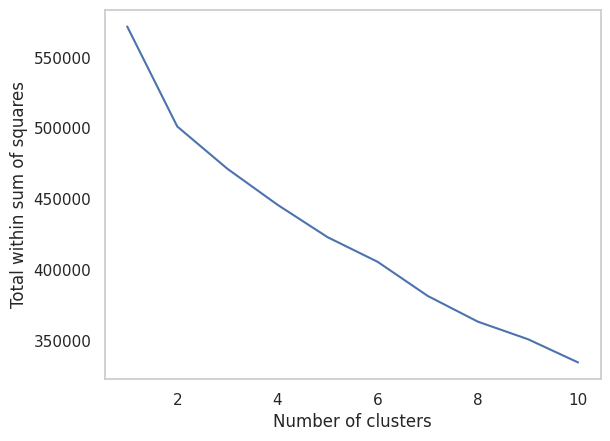

In [ ]:
plt.figure()
plt.plot(list(wss.keys()), list(wss.values()))
plt.grid()
plt.xlabel('Number of clusters')
plt.ylabel('Total within sum of squares')
plt.show()

In [ ]:
from sklearn.cluster import KMeans

# Create KMeans instance with 5 clusters
kmeans = KMeans(n_clusters=6)

# Fit KMeans to customer data
kmeans.fit(final_df)

# Get cluster labels for each customer
customer_clusters = kmeans.labels_

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
kmeans_predictions=kmeans.predict(final_df)
kmeans_predictions

array([3, 2, 0, ..., 3, 4, 4], dtype=int32)

In [ ]:
train_ID=train_train['CustomerID']
train_ID

0        C37869
1        C33841
2        C29464
3        C28158
4        C22785
          ...  
23815    C14975
23816    C30392
23817    C41735
23818    C26055
23819    C25058
Name: CustomerID, Length: 23820, dtype: object

In [ ]:
rslts = pd.DataFrame({'CustomerID':train_ID, 'kmeans_cluster':kmeans_predictions})
rslts.head()

,CustomerID,kmeans_cluster
0,C37869,3
1,C33841,2
2,C29464,0
3,C28158,2
4,C22785,0
